# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?<br>
    A: Etherium has a higher mean positive score of 0.069632  vs 0.040800 
2. Which coin had the highest negative score?<br>
    A: Bitcoin has negative score 0.213 vs 0.139
3. Which coin had the highest positive score?<br>
    A: Bitcoin has the highest postive score at 0.282 vs 0.166

#### Author's Note: The code hangs on:<br>
*print(btc_doc.ents)*<br>
and<br>
*displacy.serve(eth_doc, style="ent")*<br>
stopping the code and re running from that point works.

In [157]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### additoinal libraries

In [158]:
from newsapi.newsapi_client import NewsApiClient
# import datetime
# from datetime import datetime
from datetime import datetime, timedelta
import spacy
from pprint import pprint


In [159]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv('test1.env')
newsapi = NewsApiClient(api_key=os.getenv("NEWS_API_KEY"))
# os.getenv("NEWS_API_KEY")
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [160]:
# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

In [161]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [162]:
# Fetch all the news about bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about bitcoins: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoins: 12476


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [163]:
# Fetch all the news about etherum
etherum_headlines = newsapi.get_everything(
    q="etherum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about etherums: {etherum_headlines['totalResults']}")

# Show sample article
etherum_headlines["articles"][0]

Total articles about etherums: 19


{'source': {'id': 'independent', 'name': 'Independent'},
 'author': 'Gino Spocchia',
 'title': 'Mark Cuban says crypto is at the start of the ‘great unwind’ as prices plummet',
 'description': 'Shark Tank star and billionaire investor says ‘the best platforms will do well over the long term’, after fall in value of major cryptocurrencies',
 'url': 'https://www.independent.co.uk/news/world/americas/mark-cuban-bitcoin-cryto-china-b1852796.html',
 'urlToImage': 'https://static.independent.co.uk/2021/05/24/12/AFP_1QB9R8-1.jpg?width=1200&auto=webp&quality=75',
 'publishedAt': '2021-05-24T12:23:43Z',
 'content': 'Cryptocurrencies are at the start of the great unwind, according to billionaire investor Mark Cuban.\r\nThe star of NBCs Shark Tank said cryptocurrencies were falling in value because of an unwinding o… [+1378 chars]'}

In [164]:
# Create the Facebook bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000
3,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925
4,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831


In [165]:
# Create the Facebook etherum sentiment scores DataFrame
etherum_sentiments = []

for article in etherum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        etherum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
etherum_df = pd.DataFrame(etherum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
etherum_df = etherum_df[cols]

etherum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-24,Cryptocurrencies are at the start of the great...,0.7096,0.166,0.041,0.793
1,2021-05-20,Dogecoin has turned into Elon Musk’s unofficia...,0.0000,0.000,0.000,1.000
2,2021-06-05,Cryptocurrencies are always in the news. Be it...,-0.2484,0.065,0.139,0.796
3,2021-05-27,"NEW YORK--(BUSINESS WIRE)--WallStreetBets, the...",-0.3818,0.000,0.088,0.912
4,2021-06-04,BackyardProduction / iStock.com\r\nCryptocurre...,0.3818,0.141,0.065,0.794


In [166]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.047065,0.040800,0.050270,0.908930
std,0.390229,0.059448,0.057748,0.078156
min,-0.778300,0.000000,0.000000,0.718000
25%,-0.288875,0.000000,0.000000,0.856750
50%,0.000000,0.000000,0.051500,0.925000
75%,0.128000,0.070750,0.083000,1.000000
max,0.840200,0.282000,0.213000,1.000000


In [167]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
etherum_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.108237,0.069632,0.046053,0.884263
std,0.307894,0.059478,0.040611,0.078968
min,-0.401900,0.000000,0.000000,0.793000
25%,-0.115350,0.000000,0.000000,0.795000
50%,0.000000,0.063000,0.065000,0.883000
75%,0.381800,0.131000,0.066000,0.932000
max,0.709600,0.166000,0.139000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium has a higher mean positive score of 0.069632  vs 0.040800 

Q: Which coin had the highest compound score?

A: Bitcoin has higest compound score 0.8402 vs 0.7096

Q. Which coin had the highest positive score?

A: Bitcoin has the highest postive score at 0.282 vs 0.166

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [168]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [169]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [171]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    tokens = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in tokens]
    # Convert the words to lowercase
    l_case = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in l_case if word not in sw]
    
    return tokens

In [172]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df ['tokens'] = bitcoin_df['text'].apply (lambda x: tokenizer(x))
bitcoin_df.head(5)

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,"[illustration, alex, castro, verge, cryptocurr..."
3,2021-05-17,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925,"[last, week, whenelon, musk, tweeted, spoken, ..."
4,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seemselon, musk, tesla, caused..."


In [173]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
etherum_df ['tokens'] = etherum_df['text'].apply (lambda x: tokenizer(x))
etherum_df.head(5)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-24,Cryptocurrencies are at the start of the great...,0.7096,0.166,0.041,0.793,"[cryptocurrencies, start, great, unwind, accor..."
1,2021-05-20,Dogecoin has turned into Elon Musk’s unofficia...,0.0000,0.000,0.000,1.000,"[dogecoin, ha, turned, elon, musks, unofficial..."
2,2021-06-05,Cryptocurrencies are always in the news. Be it...,-0.2484,0.065,0.139,0.796,"[cryptocurrencies, always, news, market, dip, ..."
3,2021-05-27,"NEW YORK--(BUSINESS WIRE)--WallStreetBets, the...",-0.3818,0.000,0.088,0.912,"[new, yorkbusiness, wirewallstreetbets, grassr..."
4,2021-06-04,BackyardProduction / iStock.com\r\nCryptocurre...,0.3818,0.141,0.065,0.794,"[backyardproduction, istockcomcryptocurrencies..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [174]:
from collections import Counter
from nltk import ngrams

### assume cannot do bigram accross two headlines.

In [175]:
# Generate the Bitcon N-grams where N=2
# YOUR CODE HERE!
# combine all tokens into one list
all_btc_tokens = []
for index, row in bitcoin_df.iterrows():
    all_btc_tokens.extend(row['tokens'])
# create bigrams
btc_bigrams = ngrams (all_btc_tokens,2)

In [176]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
# combine all tokens into one list
all_eth_tokens = []
for index, row in etherum_df.iterrows():
    all_eth_tokens.extend(row['tokens'])
# create bigrams
eth_bigrams = ngrams (all_eth_tokens,2)

In [177]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [178]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_top_10 = token_count(all_btc_tokens,10)
btc_top_10

[('char', 99),
 ('bitcoin', 80),
 ('cryptocurrency', 32),
 ('reuters', 27),
 ('world', 19),
 ('currency', 19),
 ('tesla', 18),
 ('ha', 17),
 ('week', 17),
 ('elon', 17)]

In [179]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top_10 = token_count(all_eth_tokens, 10)
eth_top_10

[('char', 19),
 ('cryptocurrencies', 6),
 ('market', 6),
 ('cryptocurrency', 6),
 ('ha', 5),
 ('backyardproduction', 4),
 ('istockcomcryptocurrencies', 4),
 ('skyrocketed', 4),
 ('popularity', 4),
 ('recently', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [180]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

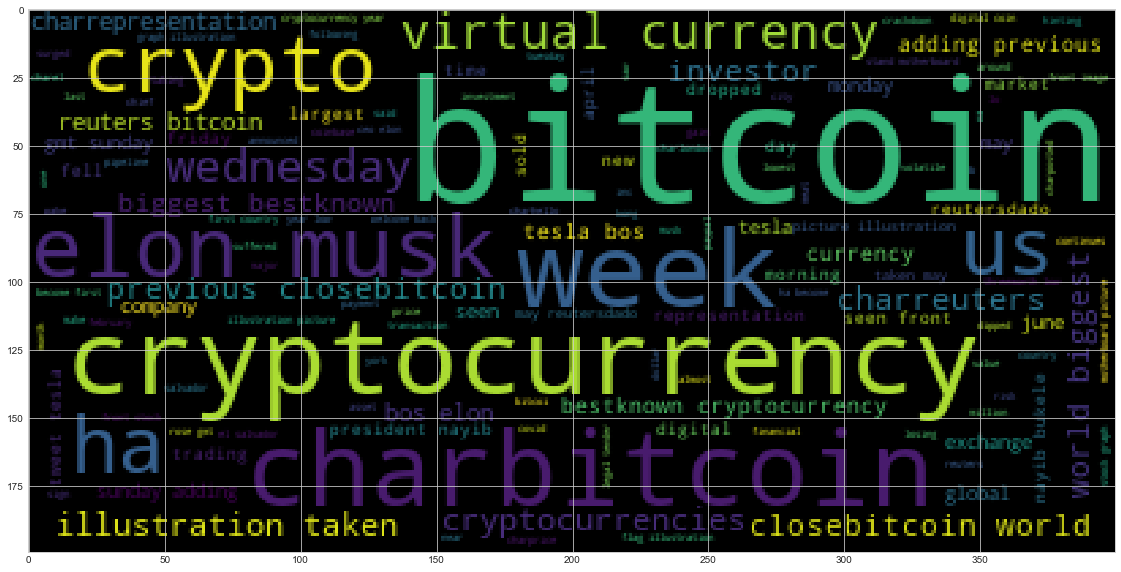

In [181]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
# create big string
btc_big_string = ' '
for index, row in bitcoin_df.iterrows():
    btc_big_string =  btc_big_string  + ' '.join(row['tokens'])
 
# display it
wc = WordCloud().generate(btc_big_string)
plt.imshow(wc)


In [182]:
# safe to file for use in Readme
wc.to_file('./Images/btc_cloud1.png')

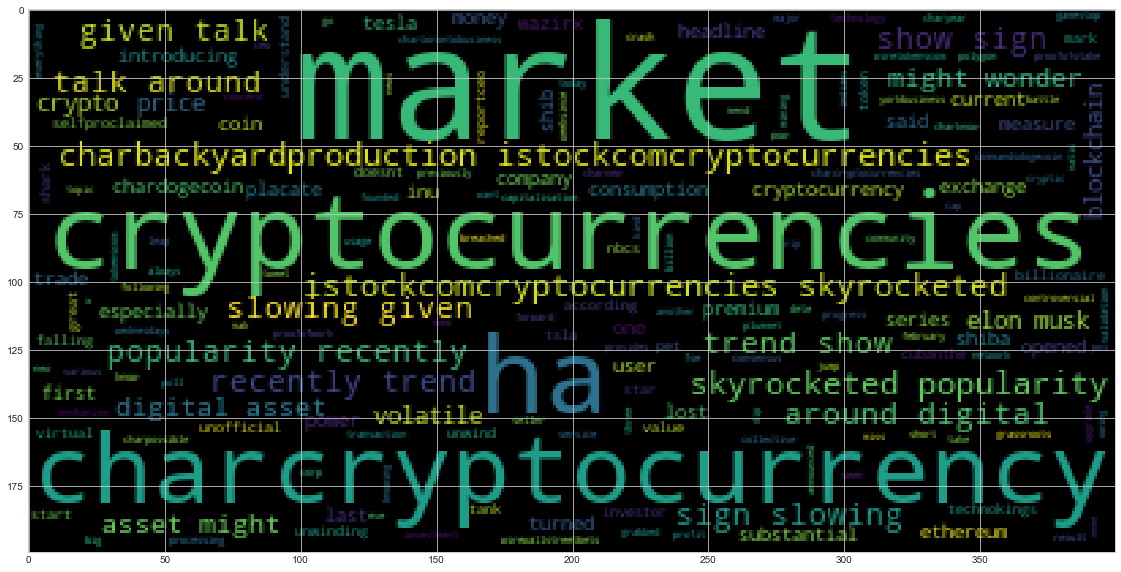

In [183]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_big_string = ' '
for index, row in etherum_df.iterrows():
    eth_big_string =  eth_big_string  + ' '.join(row['tokens'])
 
# display it
wc = WordCloud().generate(eth_big_string)
plt.imshow(wc)

In [184]:
# save the file to use in readme
wc.to_file('Images/eth_word_cloud1.jpg')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [185]:
import spacy
from spacy import displacy

In [186]:
# done already. - delete
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [187]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

##### Hassan's note: *Done in previous section*

In [188]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
# already done.
btc_big_string[0:20]

' el salvadors presid'

In [189]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
#  take a subset of the document
# btc_doc = nlp (btc_big_string[:1000])
btc_doc = nlp (btc_big_string)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "BTC NER"
# displacy.serve(btc_doc, style="ent")

In [190]:
# Render the visualization
# YOUR CODE HERE!
displacy.serve(btc_doc, style="ent")

C:\Users\Hassan\Anaconda3\envs\pyvizenv\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [191]:
# List all Entities
# YOUR CODE HERE!
print(btc_doc.ents)

(american, first, wednesday, morning, bin, past month first, billion, couple day, tuesday night, wednesday morning, hundred billion, morning, first, last weekend, week reviewlast week, wednesday, week reviewlast week, week, monday, weekend, threemonth, monday, threemonth, monday, weekend, monday, weekend, sunday, one quarter, late last week, first, monday, morning, today, offabout quarter, week, wednesday, wednesday, saturday, third, sunday, sunday, sunday, sunday, sunday, friday, sunday, sunday, thursday, monday, monday, monday, sunday, california, morning, two, overnight, half million, friday, wednesday, first, six month, one, first, july, million, friday lowest week, friday lowest week, saturday, next week, wednesday, first, april, monday, week, april, first time week, first, sunday, friday, weekly, month, wednesday, past day, two week, second, eth, sunday, wednesday, tuesday, one dollar, tuesday, april, wednesday)


### Show entities in a labeled list

In [192]:
# btc_lables = [x.label_ for x in btc_doc.ents]
# Counter(btc_lables)
pprint([(X.text, X.label_) for X in btc_doc.ents])

[('american', 'NORP'),
 ('first', 'ORDINAL'),
 ('wednesday', 'DATE'),
 ('morning', 'TIME'),
 ('bin', 'PERSON'),
 ('past month first', 'DATE'),
 ('billion', 'CARDINAL'),
 ('couple day', 'DATE'),
 ('tuesday night', 'TIME'),
 ('wednesday morning', 'TIME'),
 ('hundred billion', 'CARDINAL'),
 ('morning', 'TIME'),
 ('first', 'ORDINAL'),
 ('last weekend', 'DATE'),
 ('week reviewlast week', 'DATE'),
 ('wednesday', 'DATE'),
 ('week reviewlast week', 'DATE'),
 ('week', 'DATE'),
 ('monday', 'DATE'),
 ('weekend', 'DATE'),
 ('threemonth', 'DATE'),
 ('monday', 'DATE'),
 ('threemonth', 'DATE'),
 ('monday', 'DATE'),
 ('weekend', 'DATE'),
 ('monday', 'DATE'),
 ('weekend', 'DATE'),
 ('sunday', 'DATE'),
 ('one quarter', 'DATE'),
 ('late last week', 'DATE'),
 ('first', 'ORDINAL'),
 ('monday', 'DATE'),
 ('morning', 'TIME'),
 ('today', 'DATE'),
 ('offabout quarter', 'DATE'),
 ('week', 'DATE'),
 ('wednesday', 'DATE'),
 ('wednesday', 'DATE'),
 ('saturday', 'DATE'),
 ('third', 'ORDINAL'),
 ('sunday', 'DATE'),


---

### Ethereum NER

In [201]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
# done before
eth_big_string[0:20]

' cryptocurrencies st'

In [202]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
# eth_doc = nlp (eth_big_string[:1000])
eth_doc = nlp (eth_big_string)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "ETH NER"

In [195]:
# Render the visualization
# YOUR CODE HERE!
displacy.serve(eth_doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [203]:
# List all Entities
# YOUR CODE HERE!
eth_doc.ents

(one,
 today,
 first,
 first,
 three,
 wednesdays,
 late last week,
 thursday,
 immensely past year,
 summer,
 yesterday)

### Show entities in a labeled list

In [204]:
# List all Entities
# YOUR CODE HERE!
pprint([(X.text, X.label_) for X in eth_doc.ents])

[('one', 'CARDINAL'),
 ('today', 'DATE'),
 ('first', 'ORDINAL'),
 ('first', 'ORDINAL'),
 ('three', 'CARDINAL'),
 ('wednesdays', 'DATE'),
 ('late last week', 'DATE'),
 ('thursday', 'DATE'),
 ('immensely past year', 'DATE'),
 ('summer', 'DATE'),
 ('yesterday', 'DATE')]


---